# Modelo de Regresión - v1

GradientBoostingRegressor(n_estimators= 100, learning_rate=0.05, loss='huber', max_depth= 3, min_samples_leaf=4,
                          min_samples_split=5, subsample=0.9)

- 'algoritmo__learning_rate': 0.05, 
- 'algoritmo__loss': 'huber', 
- 'algoritmo__max_depth': 3,
- 'algoritmo__min_samples_leaf': 4, 
- 'algoritmo__min_samples_split': 5, 
- algoritmo__n_estimators': 100, 
- 'algoritmo__subsample': 0.9}"


## IMPORTACIÓN DE PAQUETES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor

#Métricas de evaluación
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Crear Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import cloudpickle

## IMPORTAR LOS DATOS

### CARGAR LOS DATOS

In [2]:
x = pd.read_pickle('../../02_Datos/03_Trabajo/x_preselecionado.pickle')
y = pd.read_pickle('../../02_Datos/03_Trabajo/y_preselecionado.pickle')

In [3]:
x.head(5)

,distance_station,latitude,age,stores,mes
0,84.87882,24.98298,32.0,10,12
1,306.59470,24.98034,19.5,9,12
2,561.98450,24.98746,13.3,5,8
3,561.98450,24.98746,13.3,5,7
4,287.60250,24.98042,20.3,6,6


## MODELIZAR

### CARGAMOS EL MEJOR MODELO CON EL ALGORITMO, PARÁMETROS Y VALORES

In [4]:
modelo = pd.read_pickle('../../04_Modelos/01_Best_estimator/GradientBoostingRegressor_v01.pickle')

### EXAMINAR EL MEJOR MODELO

In [5]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 GradientBoostingRegressor(learning_rate=0.05, loss='huber',
                                           max_depth=5, min_samples_leaf=4,
                                           subsample=0.9))])

### PREDECIR SOBRE LA VALIDACIÓN

In [6]:
pred = modelo.best_estimator_.predict(x)

### EVALUAR SOBRE LA VALIDACIÓN

In [7]:
print("%mape:", mean_absolute_percentage_error(y, pred))
print("Coeficiente de determinación:", r2_score(y,pred))
print("MAE:", mean_absolute_error(y, pred))
print("RMSE:", mean_squared_error(y,pred,squared='False'))

%mape: 0.06840102622454748
Coeficiente de determinación: 0.9163970076340795
MAE: 2.51609960926101
RMSE: 14.626807975486486


#### Gráfico entre la diferencia entre la validación y el original

In [8]:
test_y = y.reset_index().copy()
test_pred = pd.Series(pred).to_frame()
df_pred = pd.concat([test_y,test_pred], axis= 1).sort_values(by='price').reset_index()
df_pred.rename(columns = {0:'pred'}, inplace = True)
df_pred = df_pred.drop(columns= ['level_0'])
df_pred['dif'] = abs(df_pred['price']-df_pred['pred'])
# Diferencia entre predicción y validación
df_pred.sort_values(by = 'dif', ascending = False)[:10]

,index,price,pred,dif
287,154,78.3,56.379128,21.920872
286,220,78.0,59.032420,18.967580
70,226,26.9,42.206698,15.306698
281,273,67.7,54.566505,13.133495
263,198,55.3,42.388494,12.911506
110,18,33.6,45.312798,11.712798
162,283,40.5,51.275111,10.775111
205,44,44.3,54.419575,10.119575
259,42,55.0,45.300921,9.699079
240,239,50.4,59.609725,9.209725


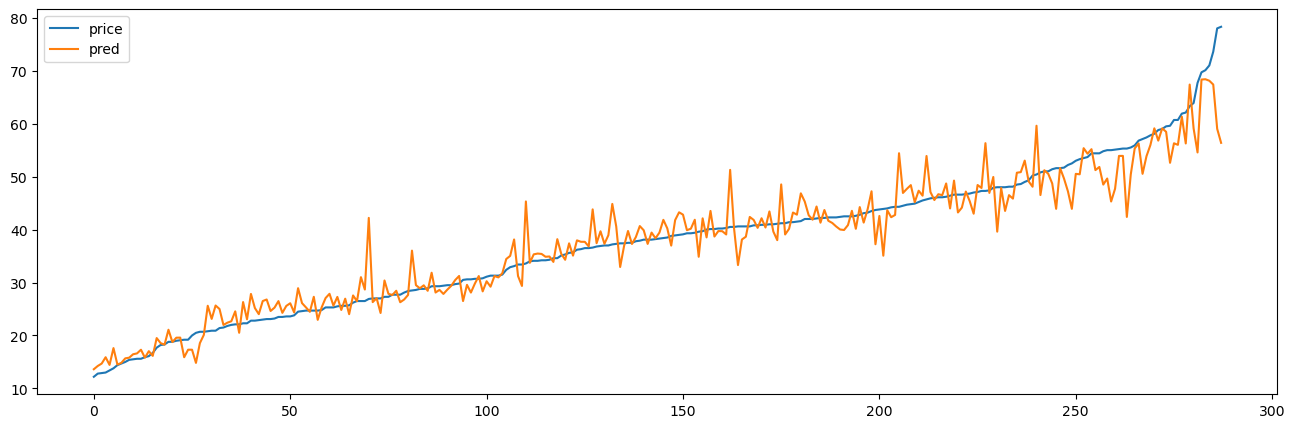

In [9]:
df_pred[['price','pred']].plot(figsize=(16,5));

## Gráficios de validación modelos de regresión

2. Gráfico de residuos vs. valores predichos: 


Un gráfico de residuos muestra los residuos (diferencias entre los valores observados y los valores predichos por el modelo) en función de los valores ajustados o las variables independientes. Este gráfico puede ayudarte a verificar si los residuos tienen algún patrón sistemático, como una relación no lineal o una heterocedasticidad.

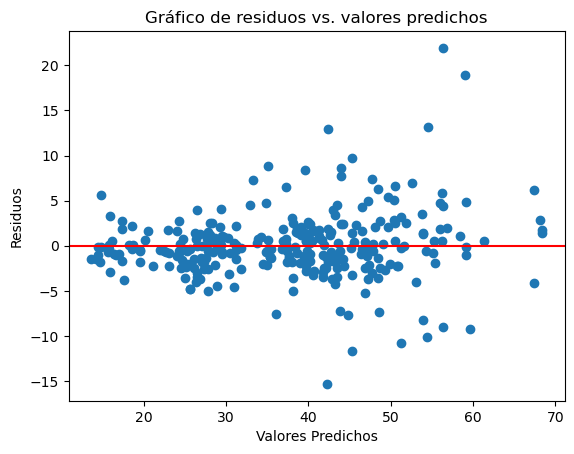

In [10]:
val_y = y
residuos = val_y - pred

plt.scatter(pred, residuos)
plt.axhline(y=0, color='red')  # Línea horizontal en cero
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores predichos')
plt.show()


3. Histograma de residuos:

 Este gráfico muestra la distribución de los residuos del modelo. Puedes utilizar un histograma o un gráfico de densidad para visualizar cómo se distribuyen los residuos y verificar si siguen una distribución aproximadamente normal.

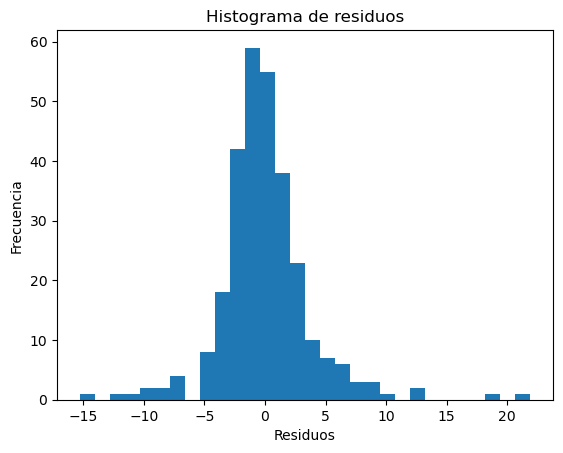

In [11]:
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

4. Gráfico de Q-Q (cuantil-cuantil):

Este gráfico compara los cuantiles de los residuos con los cuantiles esperados de una distribución normal. Puede ayudarte a evaluar si los residuos siguen una distribución normal.

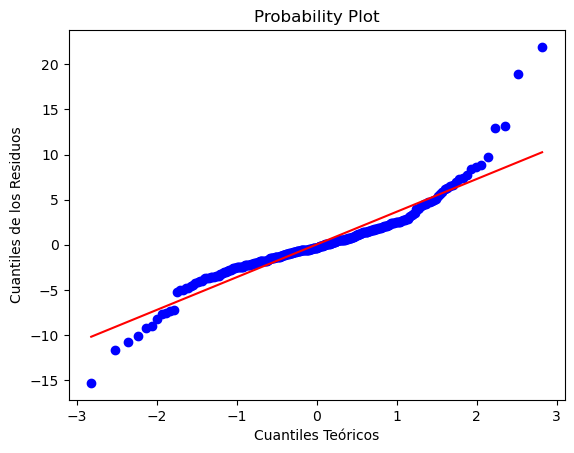

In [12]:
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')
plt.show()


5. Gráfico de influencia:

Un gráfico de influencia muestra la influencia de cada observación en el ajuste del modelo. Puede ayudarte a identificar puntos atípicos o valores influyentes que pueden tener un impacto significativo en los resultados de la regresión.

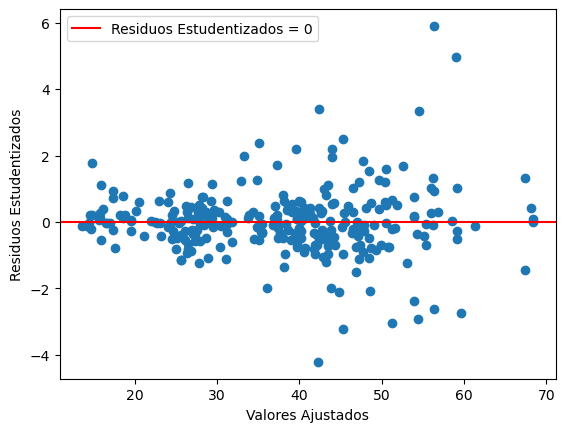

In [13]:
import statsmodels.api as sm

infl = sm.OLS(val_y, sm.add_constant(pred)).fit().get_influence()
residuos_estudentizados = infl.resid_studentized_external

plt.scatter(pred, residuos_estudentizados)
plt.axhline(y=0, color='r', linestyle='-', label='Residuos Estudentizados = 0')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()

### CREAR PIPELINE DE ENTRENAMIENTO

### Instanciar el Modelo

In [14]:
modelo = GradientBoostingRegressor(n_estimators= 100, learning_rate=0.05, loss='huber', max_depth= 3, min_samples_leaf=4,
                          min_samples_split=5, subsample=0.9)

### Crear el pipe final de de entrenamiento

In [15]:
pipe_entrenamiento = make_pipeline(modelo)

#### Guardar el pipe final de entrenamiento

In [16]:
nombre_pipe_entrenamiento = 'pipe_entrenamiento_v1.pickle'
ruta_pipe_entrenamiento = '../../04_Modelos/' + nombre_pipe_entrenamiento

with open (ruta_pipe_entrenamiento, mode= 'wb') as file:
    cloudpickle.dump(pipe_entrenamiento, file)


#### Entrenar el pipe final de ejecucción

In [17]:
pipe_ejecucion = pipe_entrenamiento.fit(x,y)

#### Guardar el pipe final de entrenamiento

In [18]:
nombre_pipe_ejecucion = 'pipe_ejecucion_v1.pickle'
ruta_pipe_ejecucion = '../../04_Modelos/' + nombre_pipe_ejecucion

with open (ruta_pipe_ejecucion, mode= 'wb') as file:
    cloudpickle.dump(pipe_ejecucion, file)
